## 1차원 데이터
- 평균값(기댓값), 표본분산, 불편분산(ddof=1), 표준편차
- 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며 그 경향을 없애기 위한 것이 불편분산임. 표본분산보다 조금 큰 값이 된다.
- 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수
- 표본분산과 비편향 분산
    - 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재
    - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아진다.
    - 즉, 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라고 한다.
    - 통계학에서는 이 비편향분산을 사용하는 경우가 많다.
    - 불편분산은 n대신 n-1로 나누어 구할 수 있다.
## [표본분산이 분산을 과소 평가하는 이유]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [2]:
scores = np.array(df.english)[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [3]:
score_df = pd.DataFrame({'score':scores},
                        index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],name = 'student'))
score_df
                        

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [4]:
score_df.describe()

,score
count,10.000000
mean,55.000000
std,9.775252
min,41.000000
25%,48.250000
50%,56.500000
75%,63.250000
max,69.000000


In [5]:
# 평균값
print(sum(scores)/len(scores))
print(np.mean(scores))
score_df.mean()

55.0
55.0


score    55.0
dtype: float64

In [6]:
# 중앙값
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [7]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 - 1]
median

56.5

In [8]:
print(np.median(scores))
score_df.median()

56.5


score    56.5
dtype: float64

In [9]:
# 최빈값
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [10]:
# 분산과 표준편차
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [11]:
np.mean(deviation ** 2)

86.0

In [12]:
np.var(scores)

86.0

In [13]:
# Q. 20개 원소로 구성되는 배열을 만든 후 평균, 편차 및 편차의 합을 구하세요.
a = np.arange(1,21)
mean = np.mean(a)
devi = a - mean
devi_sum = np.sum(devi)
print(mean)
print(devi)
print(devi_sum)

10.5
[-9.5 -8.5 -7.5 -6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5
  4.5  5.5  6.5  7.5  8.5  9.5]
0.0


분산
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산
    * Numpy는 표본분산, Pandas는 불편분산
    * Pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof=0이라고 설정.
 

In [14]:
np.mean(deviation ** 2)

86.0

In [15]:
np.var(scores)

86.0

In [16]:
df = score_df.copy()
df['deviation'] = deviation
df['square of deviation'] = np.square(deviation)
df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [17]:
df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [18]:
np.sqrt(86)

9.273618495495704

In [19]:
# 표준편차
np.sqrt(np.var(scores,ddof=0))

9.273618495495704

In [20]:
np.std(scores, ddof=1) # ddof=0 이 default라 안붙여도 된다

9.775252199076787

In [21]:
df.std(ddof=1)

score                   9.775252
deviation               9.775252
square of deviation    78.335461
dtype: float64

In [22]:
# 범위와 4분위수 범위
np.max(scores) - np.min(scores)

28

In [23]:
scores_Q1 = np.percentile(scores,25)
scores_Q2 = np.median(scores)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [24]:
# 요약 통계
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [25]:
# 데이터의 정규화
print(f'평균: {scores.mean()}, 표준편차: {scores.std().round(4)}')

평균: 55.0, 표준편차: 9.2736


In [26]:
# 표준화 - zscore
z = (scores - np.mean(scores))/np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [27]:
np.mean(z), np.std(z,ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

In [28]:
# 편찻값 - 평균이 50, 표준편차가 10이 되도록 함
z = 50 + 10 * (scores - np.mean(scores))/np.std(scores)
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [29]:
score_df['dviation'] = z
score_df

,score,dviation
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [30]:
df = pd.read_csv('./data/ch2_scores_em.csv')
eng_scores = np.array(df.english)
pd.Series(eng_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [31]:
freq, _ = np.histogram(eng_scores,bins=10,range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [32]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq},
                    index=pd.Index(freq_class,name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [33]:
# 계급값 : 각 계급을 대표하는 값으로 계급의 중앙값이 이용됨
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [34]:
# 상대도수 : 해당 겍브의 데이털의 상대적인 비율
rel_freq = freq/ freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [35]:
# 누적상대도수 : 해당 계급까지의 상대도수 합
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [36]:
freq_dist_df['class_value'] = class_value
freq_dist_df['relative_frequency'] = rel_freq
freq_dist_df['cumulative_relative_frequency'] = cum_rel_freq
freq_dist_df

,frequency,class_value,relative_frequency,cumulative_relative_frequency
class,,,,
0~10,0,5,0.00,0.00
10~20,0,15,0.00,0.00
20~30,0,25,0.00,0.00
30~40,2,35,0.04,0.04
40~50,8,45,0.16,0.20
50~60,16,55,0.32,0.52
60~70,18,65,0.36,0.88
70~80,6,75,0.12,1.00
80~90,0,85,0.00,1.00


In [37]:
# 최빈값
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class_value']

65

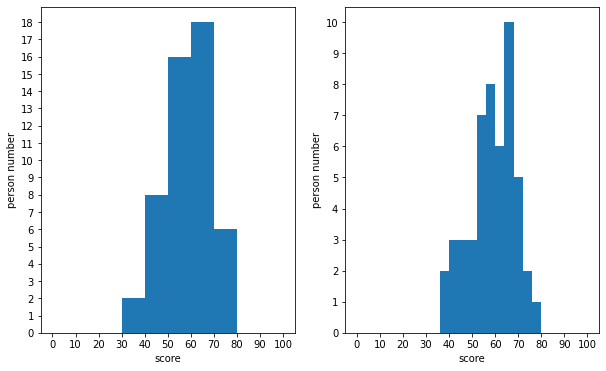

In [38]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(121)
freq,_,_ = ax1.hist(eng_scores,bins=10,range=(0,100))
ax1.set_xlabel('score')
ax1.set_ylabel('person number')
ax1.set_xticks(np.linspace(0,100,10+1))
ax1.set_yticks(np.arange(0,freq.max()+1))

ax2 = fig.add_subplot(122)
freq,_,_ = ax2.hist(eng_scores,bins=25,range=(0,100))
ax2.set_xlabel('score')
ax2.set_ylabel('person number')
ax2.set_xticks(np.linspace(0,100,10+1))
ax2.set_yticks(np.arange(0,freq.max()+1))
plt.show()
plt.close()

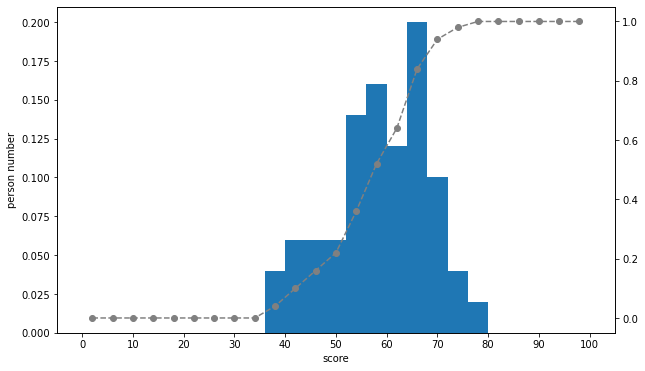

In [39]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()
# 상대도수의 히스토그램으로 하기 위해서는 도수를 데이터의 수로 나눌 필요가 있음
weights = np.ones_like(eng_scores) / len(eng_scores)
rel_freq,_,_ = ax1.hist(eng_scores,bins=25,range=(0,100),weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]

ax2.plot(class_value,cum_rel_freq,ls='--',marker='o',color='gray')
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('person number')
ax1.set_xticks(np.linspace(0,100,10+1))
plt.show()
plt.close()

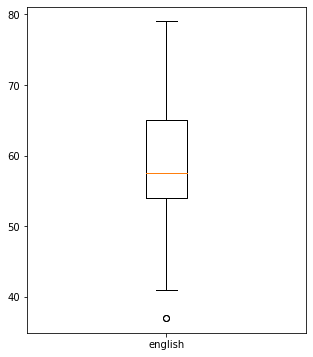

In [40]:
# 상자 그림
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(eng_scores,labels=['english'])
plt.show()
plt.close()

In [41]:
# 표본분산
data = np.array([2,3,3,4,4,4,4,5,5,6])
mu = np.sum(data)/len(data)
s = np.sum((data-mu)**2)/len(data)
s

1.2

In [42]:
# 불편분산
s1 = np.sum((data-mu)**2)/(len(data)-1)
s1

1.3333333333333333

In [43]:
# [과제] 1변향 데이터 data에 대하여 평균, 불편분산, 표준편차, 최대, 최소, 4분위수, 중앙값을 구하시오
# 함수를 사용하는 경우와 사용하지 않는 경우를 모두 수행
data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

In [44]:
# 함수 이용
a = np.array([np.mean(data), np.var(data,ddof=1), np.std(data), np.max(data), np.min(data), np.percentile(data,25), np.median(data), np.percentile(data,75)]).reshape(1,8)
df_a = pd.DataFrame(a,
                columns=['평균', '불편분산', '표준편차', '최대', '최소', '1분위수', '중앙값','3분위수'],
                index=['해당 값'])
df_a


,평균,불편분산,표준편차,최대,최소,1분위수,중앙값,3분위수
해당 값,4.0,1.333333,1.095445,6.0,2.0,3.25,4.0,4.75


In [45]:
# percentile 함수의 설명을 보기 위해 버전 확인..
np.__version__

'1.21.2'

- numpy percentile 함수의 인수들:
https://numpy.org/doc/stable/reference/generated/numpy.percentile.html
- 1.20버전:
https://numpy.org/doc/1.20/reference/generated/numpy.percentile.html
- 선형보간법:
https://en.wikipedia.org/wiki/Linear_interpolation
- 정리(i와 j 사이)
    - linear: i + (j - i) * fraction (기본값)
    - lower: i
    - higher: j
    - nearest: i or j whichever is nearest
    - midpoint: (i + j) / 2

In [46]:
# 선형 보간법을 이용한 1분위수 (default)
np.percentile(data,25,interpolation='linear')

3.25

In [47]:
# 최단입점 보간법을 이용한 1분위수
np.percentile(data,25,interpolation='nearest')

3

In [48]:
# 함수 없이 직접 구하기 (인간적으로 sum이나 len 정도는 사용하였습니다...)
import math
b = np.zeros_like(a)
df_b = pd.DataFrame(b,
                columns=['평균', '불편분산', '표준편차', '최대', '최소', '1분위수', '중앙값','3분위수'],
                index=['해당 값'])
mu = np.sum(data)/len(data)
df_b.평균 = np.sum(data)/len(data)
df_b.불편분산 = np.sum((data-mu)**2)/(len(data)-1)
df_b.표준편차 = np.sqrt(np.sum((data-mu)**2)/(len(data)))
df_b.최대 = np.max(data) # 이것도 함수 없이 가능하다. for i in data: max = 0 ; if i > max: max = i 의 형태
df_b.최소 = np.min(data)

def medi(a): # 일반적으로 생각하는 중앙값 공식..
    if len(a) % 2 ==0: return (a[len(a)//2-1]+a[len(a)//2])/2
    else: return (a[len(a)//2])

def perc(arr,q): # 분위수(선형보간법 이용) 계산
    fraction = (len(arr)-1)*(q/100) - math.floor((len(arr)-1)*(q/100))
    i = int((len(arr)-1)*(q/100) - fraction)
    return arr[i] + (arr[i+1]-arr[i])*fraction

df_b['1분위수'] = perc(data,25)
df_b.중앙값 = medi(data)
df_b['3분위수'] = perc(data,75)

df_b

,평균,불편분산,표준편차,최대,최소,1분위수,중앙값,3분위수
해당 값,4.0,1.333333,1.095445,6,2,3.25,4.0,4.75


In [49]:
display(df_a,df_b)

,평균,불편분산,표준편차,최대,최소,1분위수,중앙값,3분위수
해당 값,4.0,1.333333,1.095445,6.0,2.0,3.25,4.0,4.75


,평균,불편분산,표준편차,최대,최소,1분위수,중앙값,3분위수
해당 값,4.0,1.333333,1.095445,6,2,3.25,4.0,4.75


In [50]:
# 추가 - 선형보간법에서의 중앙값?
perc(data,50)

4.0

## 2차원 데이터

In [51]:
df = pd.read_csv('./data/ch2_scores_em.csv',index_col='student number')

en_scores = np.array(df.english)[:10]
ms_scores = np.array(df.mathematics)[:10]
sdf = pd.DataFrame({'english': en_scores, 'mathematics': ms_scores},
                    index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],name = 'student'))
sdf.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


In [52]:
# 공분산
dfc = sdf.copy()
dfc['eng_deviation'] = dfc.english - dfc.english.mean()
dfc['math_deviation'] = dfc.mathematics - dfc.mathematics.mean()
dfc['product of deviation'] = dfc['eng_deviation']*dfc['math_deviation']
dfc

,english,mathematics,eng_deviation,math_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [53]:
dfc['product of deviation'].mean()

62.8

In [54]:
cov_mat = np.cov(en_scores,ms_scores)
cov_mat

array([[95.55555556, 69.77777778],
       [69.77777778, 76.04444444]])

In [55]:
# np.cov 함수는 공분산 값을 리턴하는 게 아니라 공분산행렬을 반환한다.
# 1행 1열은 eng 자기 자신의 공분산 즉, eng 의 분산값을
# 2행 2열은 math 자기 자신의 공분산 즉, math의 분산값을 반환한다.
# 따라서 1행 2열 그리고 2행 1열만 두 변수의 공분산을 반환한다.

cov_mat = np.cov(en_scores,ms_scores,ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [56]:
np.var(en_scores,ddof=0), np.var(ms_scores,ddof=0)

(86.0, 68.44000000000001)

In [57]:
# 상관계수
np.cov(en_scores,ms_scores,ddof=0)[0,1]/(np.std(en_scores)*np.std(ms_scores))


0.8185692341186713

In [58]:
np.corrcoef(en_scores,ms_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [59]:
dfc[['english','mathematics']].corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


In [60]:
# [과제] 10행 2열 2차원 배열을 생성하고 두열간의 공분산 및 상관계수를 구하세
# 단, numpy pandas 두 가지 방식으로 모두 수행하세요.
arr = np.random.randint(1,101,size=20).reshape(10,2)
print(arr)
a = arr[:,0]
b = arr[:,1]
print(f'공분산: {np.cov(a,b,ddof=0)[0,1]}, 상관계수: {np.corrcoef(a,b,ddof=0)[0,1]}')
df_arr = pd.DataFrame(arr,columns=['a','b'])
display(df_arr)
print(f'공분산: {df_arr.cov(ddof=0).iloc[0,1]}, 상관계수: {df_arr.corr().iloc[0,1]}')

[[ 45  58]
 [ 83  21]
 [ 84  19]
 [ 45  87]
 [ 38  50]
 [ 35 100]
 [ 20  67]
 [ 72  94]
 [ 99  41]
 [ 54  71]]
공분산: -369.5, 상관계수: -0.5623043836635999


C:\Users\admin\AppData\Local\Temp/ipykernel_7244/934835257.py:7: DeprecationWarning: bias and ddof have no effect and are deprecated
  print(f'공분산: {np.cov(a,b,ddof=0)[0,1]}, 상관계수: {np.corrcoef(a,b,ddof=0)[0,1]}')


,a,b
0,45,58
1,83,21
2,84,19
3,45,87
4,38,50
5,35,100
6,20,67
7,72,94
8,99,41
9,54,71


공분산: -369.5, 상관계수: -0.5623043836635998


Text(0, 0.5, 'mathematics')

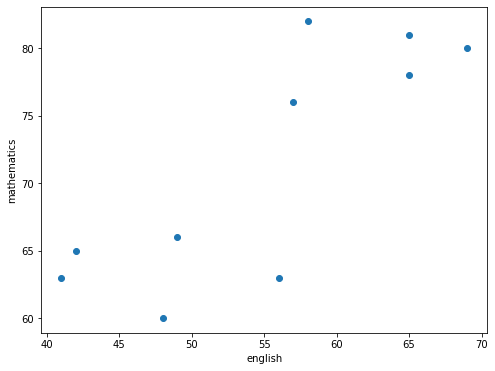

In [61]:
# 산점도
df2 = dfc[['english','mathematics']]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(en_scores,ms_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

다항곡선 회귀분석
기본문법: p = polyfit(x,y,n)  
https://qlsenddl-lab.tistory.com/48


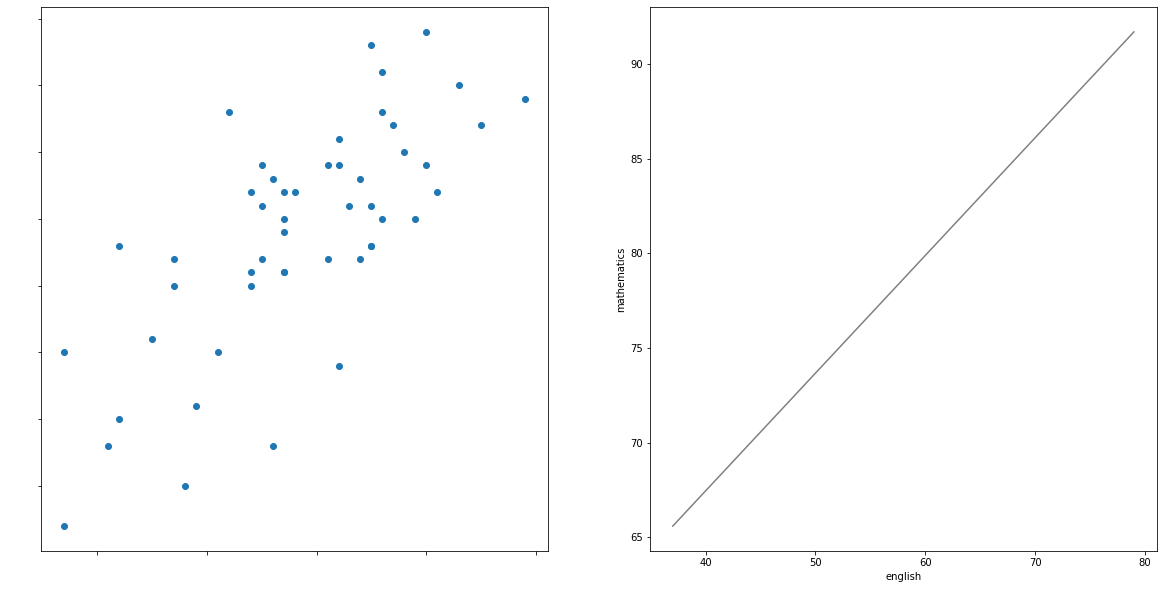

In [113]:
# 회귀직선
eng_scores = np.array(df['english'])
ms_scores = np.array(df['mathematics'])
# 계수 구하기
poly_fit = np.polyfit(eng_scores,ms_scores,1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(eng_scores.min(),eng_scores.max())
ys = poly_1d(xs)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(eng_scores,ms_scores,label='score')
ax2.plot(xs,ys,color='gray',label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax1.set_xlabel('english')
ax1.set_ylabel('mathematics')
ax2.set_xlabel('english')
ax2.set_ylabel('mathematics')
[t.set_color('white') for t in ax1.xaxis.get_ticklabels()]
[t.set_color('white') for t in ax1.yaxis.get_ticklabels()]
ax1.xaxis.label.set_color('white')
ax1.yaxis.label.set_color('white')
plt.show()


<AxesSubplot:xlabel='english', ylabel='mathematics'>

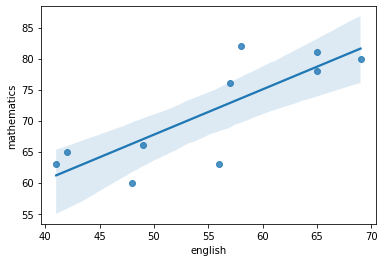

In [83]:
import seaborn as sns
sns.regplot(x='english',y='mathematics',data = df2,fit_reg=True)

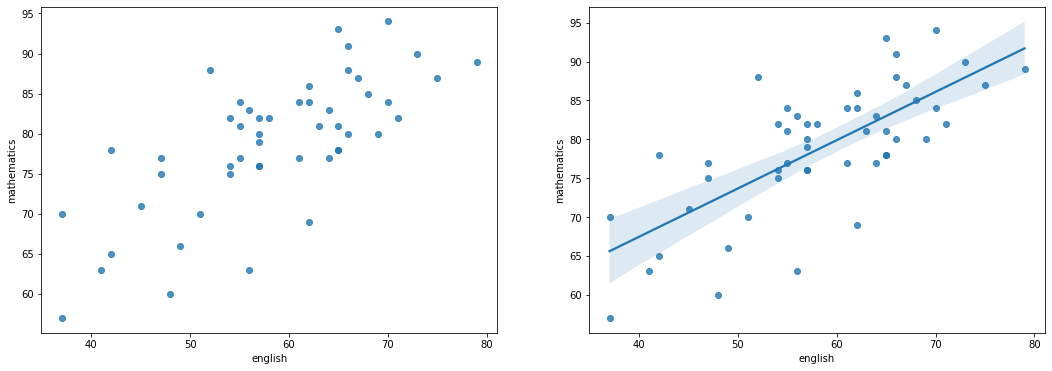

In [84]:
fig,axes = plt.subplots(1,2,figsize=(18,6),sharex=True)
sns.regplot(ax=axes[0], x=df.english, y=df.mathematics, fit_reg=False)
sns.regplot(ax=axes[1], x=df.english, y=df.mathematics)
plt.show()

In [ ]:
# Q. english와 mathematics 두변수의 상관관계를 히트맵으로 표현

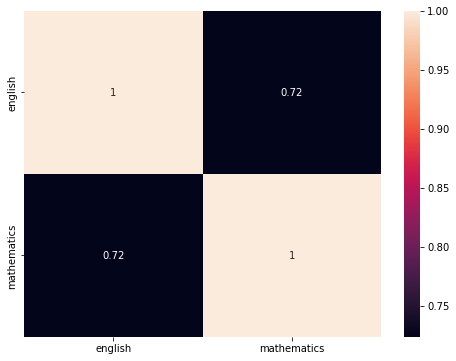

In [100]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
sns.heatmap(df.corr(),ax=ax,annot=True)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')

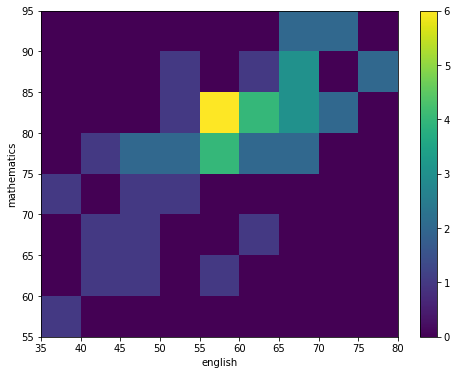

In [86]:
# 히트맵
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
c = ax.hist2d(eng_scores,ms_scores,
            bins=[9,8], range=[(35,80),(55,95)])
# print(c)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3],ax=ax)
plt.show()

In [116]:
anscombe_data = np.load('./data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [117]:
stats_df = pd.DataFrame(index=['X_mean','X_variance','Y_mean','Y_variance',
                        'X&Y_correlation','X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:,0]
    dataY = data[:,1]
    poly_fit = np.polyfit(dataX,dataY,1)
    stats_df[f'data{i+1}'] = \
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY):.2f}',
         f'{np.corrcoef(dataX,dataY)[0,1]:.2f}',
         f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


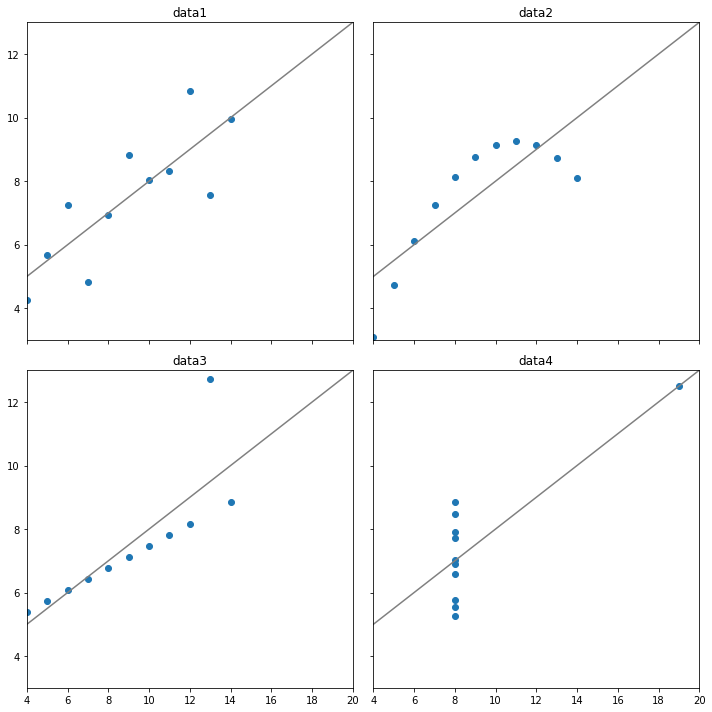

In [118]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,10),
                        sharex=True,sharey=True)
xs = np.linspace(0,30,100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0],data[:,1],1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    ax=axes[i//2,i%2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0],data[:,1])
    ax.plot(xs,ys,color='gray')
# 그래프 사이 간격 좁힘
plt.tight_layout()
plt.show()


In [68]:
import pandas as pd
fdf = pd.read_csv('./data/5_2_fm.csv')
fdf

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [70]:
# Q. species 그룹별 통계량을 구하세요
grouped = fdf.groupby('species')
grouped.describe()

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

In [71]:
import pandas as pd
sdf = pd.read_csv('./data/5_2_shoes.csv')
sdf

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [72]:
# Q. 각 store의 칼러별 판매량을 파악할 수 있는 피복 테이블을 작성하세요
sdf.pivot_table(index=['store','color'],values='sales',aggfunc='sum')

sales
store color       
osaka blue      13
      red        9
tokyo blue      10
      red       15

In [73]:
cdf = pd.read_csv('./data/4_cov.csv')
cdf

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


In [123]:
# Q. x,y의 공분산을 구하세요.
cdf.cov()

,x,y
x,3.646222,7.673333
y,7.673333,28.011111


In [122]:
# Q. 상관행렬을 구하세요.
cdf.corr()

,x,y
x,1.000000,0.759272
y,0.759272,1.000000
